### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('earthquakes_data.csv')
df.sample(100)

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
93466,93466,2021-09-22T12:03:30.086Z,1.8112,126.5903,33.84,5.40,mww,NaN,67.0,1.291,...,2022-08-08T13:32:59.525Z,"143 km NW of Ternate, Indonesia",earthquake,6.6,5.0,0.098,10.0,reviewed,us,us
79015,79015,2012-11-26T00:17:14.860Z,-9.0980,-108.3290,10.00,5.40,mwb,291.0,37.1,NaN,...,2022-05-03T15:59:37.766Z,central East Pacific Rise,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
7573,7573,1952-05-26T02:46:36.600Z,28.4000,94.4880,20.00,5.96,mw,NaN,NaN,NaN,...,2022-04-26T18:03:25.860Z,"Arunachal Pradesh, India",earthquake,NaN,6.7,0.200,NaN,reviewed,iscgem,iscgem
28409,28409,1981-07-10T14:41:17.480Z,-3.1440,130.3370,47.80,5.00,mb,NaN,NaN,NaN,...,2014-11-07T00:29:46.161Z,"158 km E of Amahai, Indonesia",earthquake,NaN,8.7,NaN,1.0,reviewed,us,us
13694,13694,1969-09-27T16:56:24.850Z,38.7400,75.1880,15.00,5.16,mw,NaN,NaN,NaN,...,2022-04-26T21:58:10.048Z,"106 km SW of Kashgar, China",earthquake,NaN,25.0,0.200,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,3334,1931-05-29T08:26:20.380Z,13.1890,120.6260,35.00,5.55,mw,NaN,NaN,NaN,...,2022-04-25T22:17:55.539Z,"4 km SE of Mamburao, Philippines",earthquake,NaN,18.4,0.200,NaN,reviewed,iscgem,iscgem
82780,82780,2015-03-05T22:54:48.550Z,28.0428,56.8139,10.00,5.20,mb,NaN,44.0,3.132,...,2015-05-28T00:48:34.040Z,"104 km NNW of M?n?b, Iran",earthquake,7.2,1.8,0.046,162.0,reviewed,us,us
54618,54618,1998-10-13T20:41:13.890Z,40.0270,143.2970,33.00,5.50,mwc,NaN,NaN,NaN,...,2022-04-29T17:53:25.462Z,"123 km ENE of Miyako, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
18330,18330,1974-12-16T06:23:02.400Z,49.7550,78.0640,33.00,5.00,mb,NaN,NaN,NaN,...,2017-04-13T21:48:29.504Z,"116 km SSW of Kurchatov, Kazakhstan",nuclear explosion,NaN,NaN,NaN,NaN,reviewed,us,us


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110133 entries, 0 to 110132
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       110133 non-null  int64  
 1   time             110133 non-null  object 
 2   latitude         110133 non-null  float64
 3   longitude        110133 non-null  float64
 4   depth            109848 non-null  float64
 5   mag              110133 non-null  float64
 6   magType          110133 non-null  object 
 7   nst              39492 non-null   float64
 8   gap              49783 non-null   float64
 9   dmin             29839 non-null   float64
 10  rms              81386 non-null   float64
 11  net              110133 non-null  object 
 12  id               110133 non-null  object 
 13  updated          110133 non-null  object 
 14  place            109242 non-null  object 
 15  type             110133 non-null  object 
 16  horizontalError  28459 non-null   floa

In [ ]:
df.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0             0
time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70641
gap                60350
dmin               80294
rms                28747
net                    0
id                     0
updated                0
place                891
type                   0
horizontalError    81674
depthError         49715
magError           67061
magNst             60025
status                 0
locationSource         0
magSource              0
dtype: int64

In [ ]:
df.shape

(110133, 23)

In [ ]:
round(df.isnull().sum()*100/df.shape[0],2)

Unnamed: 0          0.00
time                0.00
latitude            0.00
longitude           0.00
depth               0.26
mag                 0.00
magType             0.00
nst                64.14
gap                54.80
dmin               72.91
rms                26.10
net                 0.00
id                  0.00
updated             0.00
place               0.81
type                0.00
horizontalError    74.16
depthError         45.14
magError           60.89
magNst             54.50
status              0.00
locationSource      0.00
magSource           0.00
dtype: float64

In [ ]:
round(df.isnull().sum()*100/df.shape[0],2)

Unnamed: 0          0.00
time                0.00
latitude            0.00
longitude           0.00
depth               0.26
mag                 0.00
magType             0.00
nst                64.14
gap                54.80
dmin               72.91
rms                26.10
net                 0.00
id                  0.00
updated             0.00
place               0.81
type                0.00
horizontalError    74.16
depthError         45.14
magError           60.89
magNst             54.50
status              0.00
locationSource      0.00
magSource           0.00
dtype: float64

In [ ]:
# Display missing value percentage
missing_percent = round(df.isnull().sum() * 100 / len(df), 2)
print(missing_percent)

# Automatically detect and drop columns with >30% missing values
threshold = 30
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
print(f"Columns dropped due to missing >{threshold}%:\n{cols_to_drop}\n")

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Confirm shape after dropping
print(f"Data shape after dropping columns: {df.shape}")


Unnamed: 0          0.00
time                0.00
latitude            0.00
longitude           0.00
depth               0.26
mag                 0.00
magType             0.00
nst                64.14
gap                54.80
dmin               72.91
rms                26.10
net                 0.00
id                  0.00
updated             0.00
place               0.81
type                0.00
horizontalError    74.16
depthError         45.14
magError           60.89
magNst             54.50
status              0.00
locationSource      0.00
magSource           0.00
dtype: float64
Columns dropped due to missing >30%:
['nst', 'gap', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']

Data shape after dropping columns: (110133, 16)


In [ ]:
# Check remaining missing values
round(df.isnull().sum()*100/df.shape[0],2)

Unnamed: 0         0.00
time               0.00
latitude           0.00
longitude          0.00
depth              0.26
mag                0.00
magType            0.00
rms               26.10
net                0.00
id                 0.00
updated            0.00
place              0.81
type               0.00
status             0.00
locationSource     0.00
magSource          0.00
dtype: float64

In [ ]:
# Drop specific ID-like columns
id_like_cols = ['Unnamed: 0', 'id', 'net', 'locationSource', 'magSource']
df.drop(columns=id_like_cols, inplace=True, errors='ignore')

In [ ]:
# Drop rows where 'depth' is missing (NaN)
df = df.dropna(subset=['depth'])

# Confirm rows dropped
print(f"Data shape after dropping rows with missing depth: {df.shape}")


Data shape after dropping rows with missing depth: (109848, 11)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features that likely correlate with 'rms'
predictors = ['mag', 'depth', 'nst', 'gap', 'dmin']
available_features = [f for f in predictors if f in df.columns]

# Separate rows with known and unknown RMS values
df_known = df[df['rms'].notnull()]
df_missing = df[df['rms'].isnull()]

# Keep only predictors that have minimal missingness
df_known = df_known.dropna(subset=available_features)
df_missing = df_missing.dropna(subset=available_features)

# If enough known data, train regression model
if not df_known.empty and not df_missing.empty:
    X_train = df_known[available_features]
    y_train = df_known['rms']

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing RMS values
    df.loc[df['rms'].isnull(), 'rms'] = model.predict(df_missing[available_features])

print(f"Missing RMS after regression imputation: {df['rms'].isnull().sum()}")


Missing RMS after regression imputation: 0


In [ ]:
# Check remaining missing values
round(df.isnull().sum()*100/df.shape[0],2)

time         0.00
latitude     0.00
longitude    0.00
depth        0.00
mag          0.00
magType      0.00
rms          0.00
updated      0.00
place        0.81
type         0.00
status       0.00
dtype: float64

In [ ]:
# Drop 'place' and 'updated' columns as they are not needed
df.drop(columns=['place', 'updated'], axis=1, inplace=True)

In [ ]:
# Convert single 'time' column to datetime
df['Datetime'] = pd.to_datetime(df['time'], errors='coerce')

# Extract temporal features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Second'] = df['Datetime'].dt.second
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for Month, Hour, DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop original 'time' and intermediate columns
df.drop(['time', 'Datetime', 'Month', 'Hour', 'DayOfWeek'], axis=1, inplace=True)

# Check the transformed dataframe
df.head()


,latitude,longitude,depth,mag,magType,rms,type,status,Year,Day,Minute,Second,Month_sin,Month_cos,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos
16,41.758,23.249,15.0,7.02,mw,1.032335,earthquake,reviewed,1904,4,26,0,8.660254e-01,-0.5,0.500000,-0.866025,0.000000,1.000000
17,41.802,23.108,15.0,6.84,mw,1.023418,earthquake,reviewed,1904,4,2,34,8.660254e-01,-0.5,0.500000,-0.866025,0.000000,1.000000
18,52.763,160.277,30.0,7.70,mw,1.065273,earthquake,reviewed,1904,25,0,38,1.224647e-16,-1.0,-0.707107,0.707107,-0.974928,-0.222521
19,51.424,161.638,15.0,7.50,mw,1.056114,earthquake,reviewed,1904,25,45,39,1.224647e-16,-1.0,-0.500000,-0.866025,-0.974928,-0.222521
20,30.684,100.608,15.0,7.09,mw,1.035803,earthquake,reviewed,1904,30,43,20,-8.660254e-01,-0.5,0.258819,-0.965926,0.781831,0.623490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109848 entries, 16 to 110132
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       109848 non-null  float64
 1   longitude      109848 non-null  float64
 2   depth          109848 non-null  float64
 3   mag            109848 non-null  float64
 4   magType        109848 non-null  object 
 5   rms            109848 non-null  float64
 6   type           109848 non-null  object 
 7   status         109848 non-null  object 
 8   Year           109848 non-null  int32  
 9   Day            109848 non-null  int32  
 10  Minute         109848 non-null  int32  
 11  Second         109848 non-null  int32  
 12  Month_sin      109848 non-null  float64
 13  Month_cos      109848 non-null  float64
 14  Hour_sin       109848 non-null  float64
 15  Hour_cos       109848 non-null  float64
 16  DayOfWeek_sin  109848 non-null  float64
 17  DayOfWeek_cos  109848 non-null  f

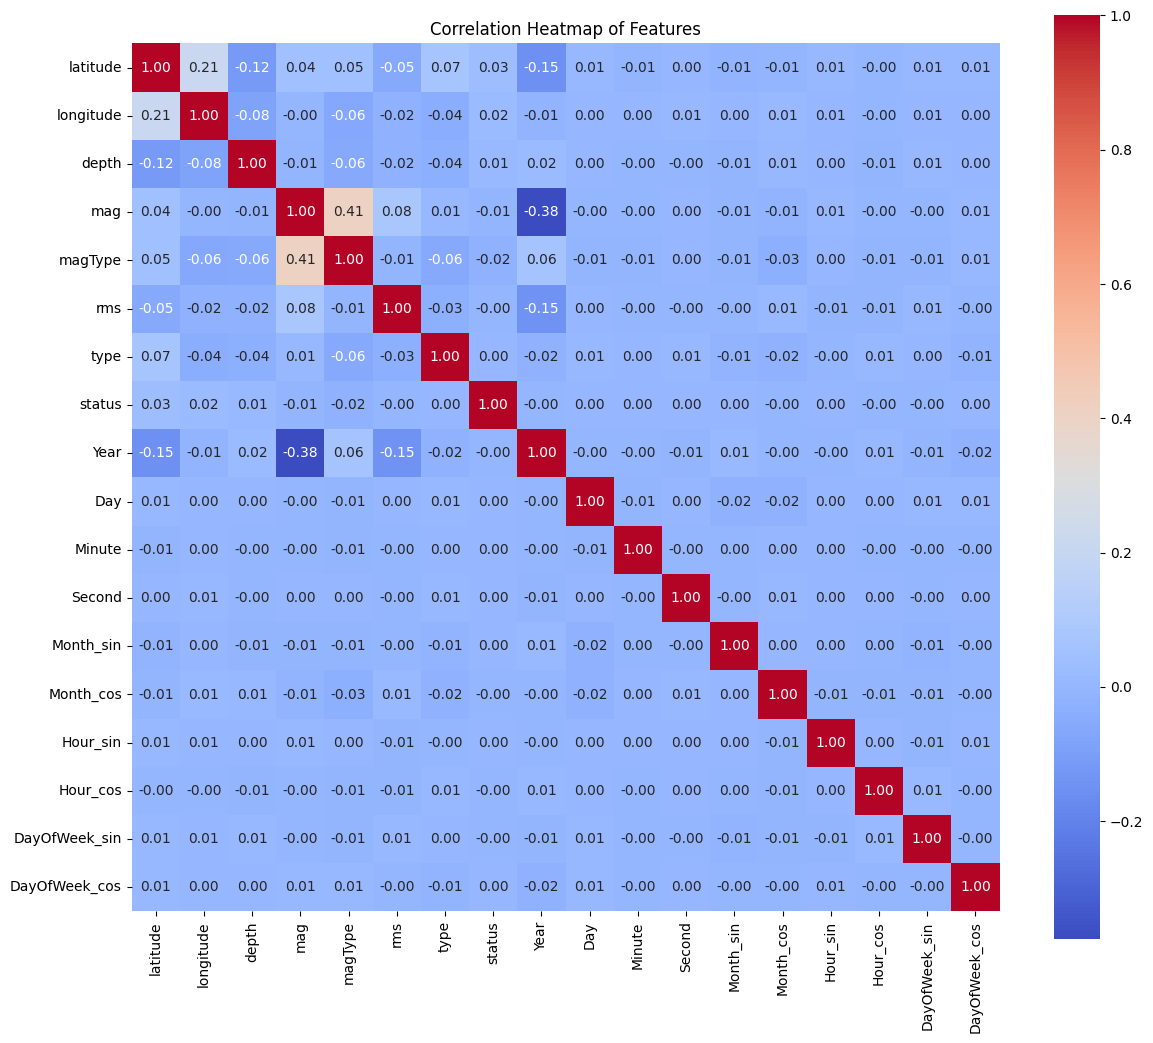

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List actual categorical columns in the current dataframe
categorical_cols = ['type', 'magType', 'status']  # Only these exist per your structure

# Create a copy for correlation
df_corr = df.copy()

# Encode categorical columns to numeric codes for correlation calculation
for col in categorical_cols:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features')
plt.show()


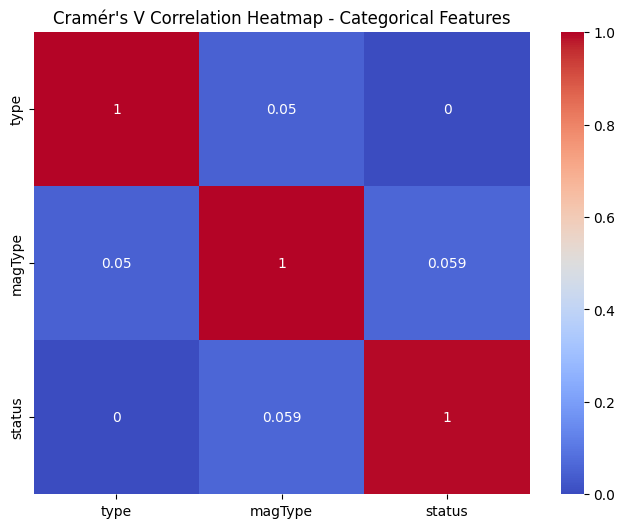

In [ ]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V correlation between two categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Updated list of categorical columns based on current DataFrame
categorical_cols = ['type', 'magType', 'status']

# Initialize empty DataFrame to store Cramér's V results
cramers_results = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                              index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair of categorical features
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot heatmap of Cramér's V values
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap - Categorical Features")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List numeric columns present in your DataFrame to scale/normalize
numeric_features = ['latitude', 'longitude', 'depth', 'mag', 'rms', 'year', 'day',
                    'month_sin', 'month_cos', 'hour_sin', 'hour_cos']

# Retain only features that actually exist in df for safety
numeric_features = [col for col in numeric_features if col in df.columns]

# Standard Scaling (z-score normalization)
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Alternatively, for Min-Max Normalization (uncomment below)
# normalizer = MinMaxScaler()
# df[numeric_features] = normalizer.fit_transform(df[numeric_features])

print(f"Scaled numeric features: {numeric_features}")


Scaled numeric features: ['latitude', 'longitude', 'depth', 'mag', 'rms']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109848 entries, 16 to 110132
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       109848 non-null  float64
 1   longitude      109848 non-null  float64
 2   depth          109848 non-null  float64
 3   mag            109848 non-null  float64
 4   magType        109848 non-null  object 
 5   rms            109848 non-null  float64
 6   type           109848 non-null  object 
 7   status         109848 non-null  object 
 8   Year           109848 non-null  int32  
 9   Day            109848 non-null  int32  
 10  Minute         109848 non-null  int32  
 11  Second         109848 non-null  int32  
 12  Month_sin      109848 non-null  float64
 13  Month_cos      109848 non-null  float64
 14  Hour_sin       109848 non-null  float64
 15  Hour_cos       109848 non-null  float64
 16  DayOfWeek_sin  109848 non-null  float64
 17  DayOfWeek_cos  109848 non-null  f

In [ ]:
# Save the preprocessed dataframe to a new CSV file
df.to_csv('preprocessed_earthquake_data.csv', index=False)